# Luminosities of far infared emission lines vs. Morphological and kinematical parameters in the Recal-L0025N0752 simulation
Here we will compare the morphological and kinematical parameters from EAGLE galaxies and the luminosities of emission lines in the far infrared spectrum in order to determine if there is a relationship between them. In this case we will use the Recal-L0025N0752 simulation.

In [1]:
import os
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import join
from astropy.table import Column
import seaborn as sns

Reading the Mophological and kinematical table

In [2]:
mk = Table.read('../../Data/Q_Recal-L0025N0752.csv', format = 'ascii')
mk

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
406515,0.3569487017380797,0.014767278998984446,-0.1301830942449702,0.46045805760096215,0.1634719883148883,0.00930053189928316,0.011432062301116574,0.9270487039083328,406515,30,225994.12,22387073000.0,180026528.0,71087136.0,21.956575,0.009557824,423,151067.22,6.7966e-15,52443386000.0,51400712000.0,970580860.0,71870216.0,225994.12
407082,0.2622378199638741,0.1269614155092328,-0.028477331943966844,0.32392781059830245,0.19864029200304217,0.05858485316105641,0.11458291771825121,0.25057474921180545,407082,30,226461.89,16142251000.0,2384954370.0,165545152.0,23.77622,0.034616005,424,148850.12,1.852961e-08,32113649700.0,27466065900.0,4479910900.0,167445168.0,226461.89
407368,0.23368906165525494,0.30732454020377187,0.29598268499741676,0.43301127861905386,0.23400708131595763,0.16375578313199896,0.3140976407283393,0.5094761770142168,407368,30,452119.2,19893022700.0,517801248.0,110604928.0,25.084852,0.022663238,425,299351.44,1.5816843e-09,46069670000.0,44574188000.0,1382330370.0,112701416.0,452119.2
407963,0.31113343407591254,0.42404456843099614,0.6267873337265929,0.6601067033026776,0.3470915150217,0.2719122981177038,0.4044790184522194,0.6034735014823451,407963,30,233368.06,19563391000.0,1321287040.0,88128064.0,24.522423,0.017714787,426,150918.98,1.8600181e-08,45205107000.0,42723647000.0,2392557310.0,88670416.0,233368.06
408500,0.3986745596812802,-0.03680179810948214,0.2091666082938547,0.42924398808420205,0.15717877191987237,-0.013196581605613756,0.05229112336297389,0.7900301035382729,408500,30,226335.95,18955028500.0,59918720.0,45881888.0,21.377172,0.005168967,427,148601.72,1.1044998e-07,39598531000.0,38978933000.0,573230530.0,46143172.0,226335.95
409360,0.3518002050503094,0.08767395900734964,-0.25995998808845533,0.3108225154690266,0.1848687839114627,0.05836545300283374,0.11092670813985452,0.781935139117436,409360,30,225994.19,23303256100.0,555611710.0,176763968.0,27.884825,0.024263134,429,147897.72,3.2154464e-08,48766411000.0,47073087000.0,1515287170.0,177815104.0,225994.19
409724,0.1344428151093724,0.611590917475116,0.3270416902056368,0.5376755724567968,0.4874974349598883,0.46364994143822147,0.9872763153390516,0.08971921811644973,409724,30,226954.3,29059688400.0,480577856.0,621581060.0,33.90682,0.029051771,430,149078.98,6.839346e-13,48440357000.0,46783443000.0,1033040640.0,623644220.0,226954.3
410180,0.530315556825776,0.08065820004254465,0.005364751651836919,0.4884916829696485,0.17523344734976237,0.04838672024430969,0.0974160193795485,0.862386198113049,410180,30,229142.38,24260642800.0,54841656.0,92930560.0,24.825726,0.0058873105,431,149472.72,1.0557458e-09,46371598000.0,46078128000.0,199776624.0,93465152.0,229142.38
410827,0.24846418008523408,0.2668390510807581,0.3077762996290503,0.4773889118819179,0.2404201641218469,0.1595475153696804,0.29246014768187173,0.5347897018993502,410827,30,228138.23,25661575200.0,348112672.0,142847760.0,29.09137,0.010009604,432,147908.73,2.0183945e-11,48180552000.0,47416050000.0,619799100.0,144478400.0,228138.23


Reading table of luminosities

In [3]:
lu = Table.read('../../Data/total_luminosities_RECA.csv', format ='ascii')
lu

GalID,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
float64,str6,float64,float64,float64,float64,float64,float64
11.0,Ref100,8.450187634229371,7.5256145616261705,7.332794018805233,6.499519055846627,6.394487963631868,5.817649210359375
6.0,Ref100,8.408184353712917,7.495340931392728,7.241338972536405,6.276553499541244,6.476954508915274,5.904120415425211
1.0,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025
4.0,Ref100,8.486389498348917,7.561499721498752,7.433742679825663,6.794526202400308,6.641563529971638,6.073023254238537
7165.0,Ref100,6.421892735076585,4.922430483063327,4.656849446909889,5.101645019101053,4.275201794723876,3.6662452767939766
4218.0,Ref100,6.9097527679986435,5.473485157441624,5.225584894137033,4.765516417527379,4.484329531191637,3.869753068480367
114.0,Ref100,7.3128993695140405,6.323854837410285,6.036992571343002,5.708932711355773,5.5350868370202475,4.963773671365811
16957.0,Ref100,6.786234163739494,4.756247658161439,4.539601741354448,5.20198438642167,3.810400935813723,3.2035042303316033
2754.0,Ref100,6.3732296390686765,4.677054129434367,4.449722018638346,4.719672450159394,3.9308498048343625,3.3184905898341914


Changing the luminosities table to a data frame and removing the data from simulation Ref-L0100N1504

In [4]:
df = lu.to_pandas()
indexNames = df[ df['Sim'] == 'Ref100' ].index
df.drop(indexNames , inplace=True)

Changing back to a astropy' table

In [5]:
lu = Table.from_pandas(df)

Joining the two tables 

In [6]:
mk_lu = join(mk,lu,keys='GalID')
mk_lu

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64
1809568,0.34388222674551716,0.025393464586648817,0.2974718996214458,0.5278080521202111,0.2234488832625949,0.014682824864777663,0.02528752169411221,0.6846548904163092,1809568,30,339743584.0,453780275000.0,5443211300.0,58857513000.0,147.6508,1.436591,1.0,360413600.0,0.00019674748,15578714600000.0,14204420500000.0,1262469510000.0,111453536000.0,372889440.0,Recal,6.999310283745709,5.558968688154772,5.23710001685355,5.714719098458671,5.221562128887422,4.623250307579788
1185365,0.25679051655481,0.329677330678525,0.41743991718562157,0.5826434799762591,0.30121438613179424,0.159927159018756,0.36922572721832403,0.39257246979284144,1185365,30,90367456.0,336599876000.0,543689340.0,71205994000.0,146.6659,0.025530169,2.0,97767096.0,4.432425e-06,10016727800000.0,8806284100000.0,1119564330000.0,90776388000.0,102345208.0,Recal,6.505945884421055,5.652842080583791,5.3208369650811775,4.438290704261847,5.302073454879694,4.7295281834042076
1230232,0.23316170156016214,0.4059094960483899,0.10812274994813564,0.5840450496081779,0.3194910731715929,0.20031870300979052,0.556246671665789,0.5380760258334389,1230232,30,91227664.0,448912163000.0,738707900.0,57717748000.0,142.26625,0.23748736,3.0,97999464.0,0.00044857574,5329336700000.0,4826635200000.0,433432232000.0,69165605000.0,103858776.0,Recal,6.230803541381562,5.215783534602246,4.880718319458195,5.119764643458,4.983923145214966,4.404495741266597
1273111,0.355957573816006,0.05139517345252187,0.4363091629976642,0.5901678704475002,0.17970560020372361,0.028764025304952243,0.046970664471139185,0.6430881550134941,1273111,30,236588128.0,371242729000.0,344076096.0,51437982000.0,134.589,0.011378701,4.0,100899144.0,0.0008318327,3889926240000.0,3704251740000.0,125157343000.0,60274926000.0,241948704.0,Recal,5.638057167870817,4.683728756373575,4.385383654273639,3.8916930673946917,4.194894759042544,3.58747373455434
1318041,0.2587776368626642,-0.04777563801065776,0.11468036504178758,0.5843911585664355,0.14178692137751084,-0.013157815884322157,0.047508825763178025,0.5939109095426238,1318041,30,61858000.0,353497121000.0,1260091520.0,51784892000.0,138.34192,0.14782065,5.0,64711692.0,2.1255055e-07,5553455100000.0,4987091900000.0,508329460000.0,57966989000.0,66880956.0,Recal,6.276242144417175,4.908513665686855,4.609733225900684,4.831360242659061,4.575760150086525,3.9631743536308366
1343568,0.5077364173445327,0.027450992608209157,-0.18737997249938587,0.6622794341170105,0.13870543656312767,0.009585298573069646,0.023449618079934457,0.8064480466081432,1343568,30,87139520.0,367008416000.0,1826331140.0,50541593000.0,124.7383,0.17997177,6.0,91437592.0,8.446476e-09,5764722700000.0,5322655700000.0,371627852000.0,70342984000.0,96615264.0,Recal,6.335244093699102,4.827667222033951,4.538341438214826,4.920966771751378,4.511983277284519,3.9045192905318684
1378064,0.46070709759442807,0.17619359449599592,0.2691476385559477,0.6112168129067082,0.2140224937167942,0.08403124308339122,0.17821728218632094,0.8909978448805032,1378064,30,282566272.0,335458304000.0,3226647300.0,32135940100.0,111.830605,0.59004754,7.0,221614608.0,0.012533081,4989283500000.0,4616050200000.0,330682204000.0,42264994000.0,286211328.0,Recal,6.790137403754924,5.6576982465865715,5.337524379245012,5.212032294282305,5.36962684570511,4.772102215950902
1397598,0.27660590343787994,0.35941736140742664,0.012764154776822356,0.24031752523188854,0.2388855777451418,0.12014928945736496,0.354775628

Defining two new parameters

In [7]:
def alpha (E, T):
    return (E**2 + 1 - T )/2

def masa (a,b):
    return a/b

Adding the corresponding columns to the new parameters

In [8]:
mk_lu['Alpha']=alpha(mk_lu['Ellipticity'], mk_lu['Triaxiality'])
mk_lu['SFR/SM']=masa(mk_lu['SFR'], mk_lu['Mass_Star'])
mk_lu

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57,Alpha,SFR/SM
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64
1809568,0.34388222674551716,0.025393464586648817,0.2974718996214458,0.5278080521202111,0.2234488832625949,0.014682824864777663,0.02528752169411221,0.6846548904163092,1809568,30,339743584.0,453780275000.0,5443211300.0,58857513000.0,147.6508,1.436591,1.0,360413600.0,0.00019674748,15578714600000.0,14204420500000.0,1262469510000.0,111453536000.0,372889440.0,Recal,6.999310283745709,5.558968688154772,5.23710001685355,5.714719098458671,5.221562128887422,4.623250307579788,0.29696322473331116,2.4407946017019102e-11
1185365,0.25679051655481,0.329677330678525,0.41743991718562157,0.5826434799762591,0.30121438613179424,0.159927159018756,0.36922572721832403,0.39257246979284144,1185365,30,90367456.0,336599876000.0,543689340.0,71205994000.0,146.6659,0.025530169,2.0,97767096.0,4.432425e-06,10016727800000.0,8806284100000.0,1119564330000.0,90776388000.0,102345208.0,Recal,6.505945884421055,5.652842080583791,5.3208369650811775,4.438290704261847,5.302073454879694,4.7295281834042076,0.47345047748300195,3.5853960552815257e-13
1230232,0.23316170156016214,0.4059094960483899,0.10812274994813564,0.5840450496081779,0.3194910731715929,0.20031870300979052,0.556246671665789,0.5380760258334389,1230232,30,91227664.0,448912163000.0,738707900.0,57717748000.0,142.26625,0.23748736,3.0,97999464.0,0.00044857574,5329336700000.0,4826635200000.0,433432232000.0,69165605000.0,103858776.0,Recal,6.230803541381562,5.215783534602246,4.880718319458195,5.119764643458,4.983923145214966,4.404495741266597,0.40151629706919,4.114633162749177e-12
1273111,0.355957573816006,0.05139517345252187,0.4363091629976642,0.5901678704475002,0.17970560020372361,0.028764025304952243,0.046970664471139185,0.6430881550134941,1273111,30,236588128.0,371242729000.0,344076096.0,51437982000.0,134.589,0.011378701,4.0,100899144.0,0.0008318327,3889926240000.0,3704251740000.0,125157343000.0,60274926000.0,241948704.0,Recal,5.638057167870817,4.683728756373575,4.385383654273639,3.8916930673946917,4.194894759042544,3.58747373455434,0.3526049801475216,2.2121204132774881e-13
1318041,0.2587776368626642,-0.04777563801065776,0.11468036504178758,0.5843911585664355,0.14178692137751084,-0.013157815884322157,0.047508825763178025,0.5939109095426238,1318041,30,61858000.0,353497121000.0,1260091520.0,51784892000.0,138.34192,0.14782065,5.0,64711692.0,2.1255055e-07,5553455100000.0,4987091900000.0,508329460000.0,57966989000.0,66880956.0,Recal,6.276242144417175,4.908513665686855,4.609733225900684,4.831360242659061,4.575760150086525,3.9631743536308366,0.37380105833399846,2.8545130498679034e-12
1343568,0.5077364173445327,0.027450992608209157,-0.18737997249938587,0.6622794341170105,0.13870543656312767,0.009585298573069646,0.023449618079934457,0.8064480466081432,1343568,30,87139520.0,367008416000.0,1826331140.0,50541593000.0,124.7383,0.17997177,6.0,91437592.0,8.446476e-09,5764722700000.0,5322655700000.0,371627852000.0,70342984000.0,96615264.0,Recal,6.335244093699102,4.827667222033951,4.538341438214826,4.920966771751378,4.511983277284519,3.9045192905318684,0.3160830011231023,3.560864613032676e-12
1378064,0.46070709759442807,0.17619359449599592,0.2691476385559477,0.6112168129067082,0.2140224937167942,0.08403124308339122,0.17821728218632094,0.8909978448805032,1378064,30,282566272.0,335458304000.0,3226647300.0,32135940100.0,111.830605,0.59004754,7.0,221614608.0,0.012533081,4989283500000.0,4616050200000.0,330682204000.0

Cheking columns of the table

In [9]:
mk_lu.columns

<TableColumns names=('GalaxyID','DMEllipticity','DiscToTotal','DispAnisotropy','Ellipticity','KappaCoRot','MedOrbitCircu','RotToDispRatio','Triaxiality','GalaxyID_1','ApertureSize','Mass_BH','Mass_DM','Mass_Gas','Mass_Star','VelDisp','SFR','GalID','MasaANegroSubGrid','AcrecionMasaANegro','Masa','MasaMateriaOscura','MasaGas','MasaEstrella','MasaANegro','Sim','logLCII','logLNII_205','logLNII_122','logLOI_145','logLOIII_88','logLNIII_57','Alpha','SFR/SM')>

Setting the parameters to be plotted

In [10]:
mkparam0=['VelDisp']
mkparam=['Alpha', 'RotToDispRatio', 'SFR/SM', 'SFR', 'Mass_BH']
luparam=['logLCII','logLNII_205','logLOI_145','logLOIII_88']
colors = ['firebrick', 'red', 'dimgrey', 'gray', 'darkgray', 'silver']

Graphing parameters vs. parameters

In [11]:
sns.set()
sns.set_style("white")
sns.set_context("talk")

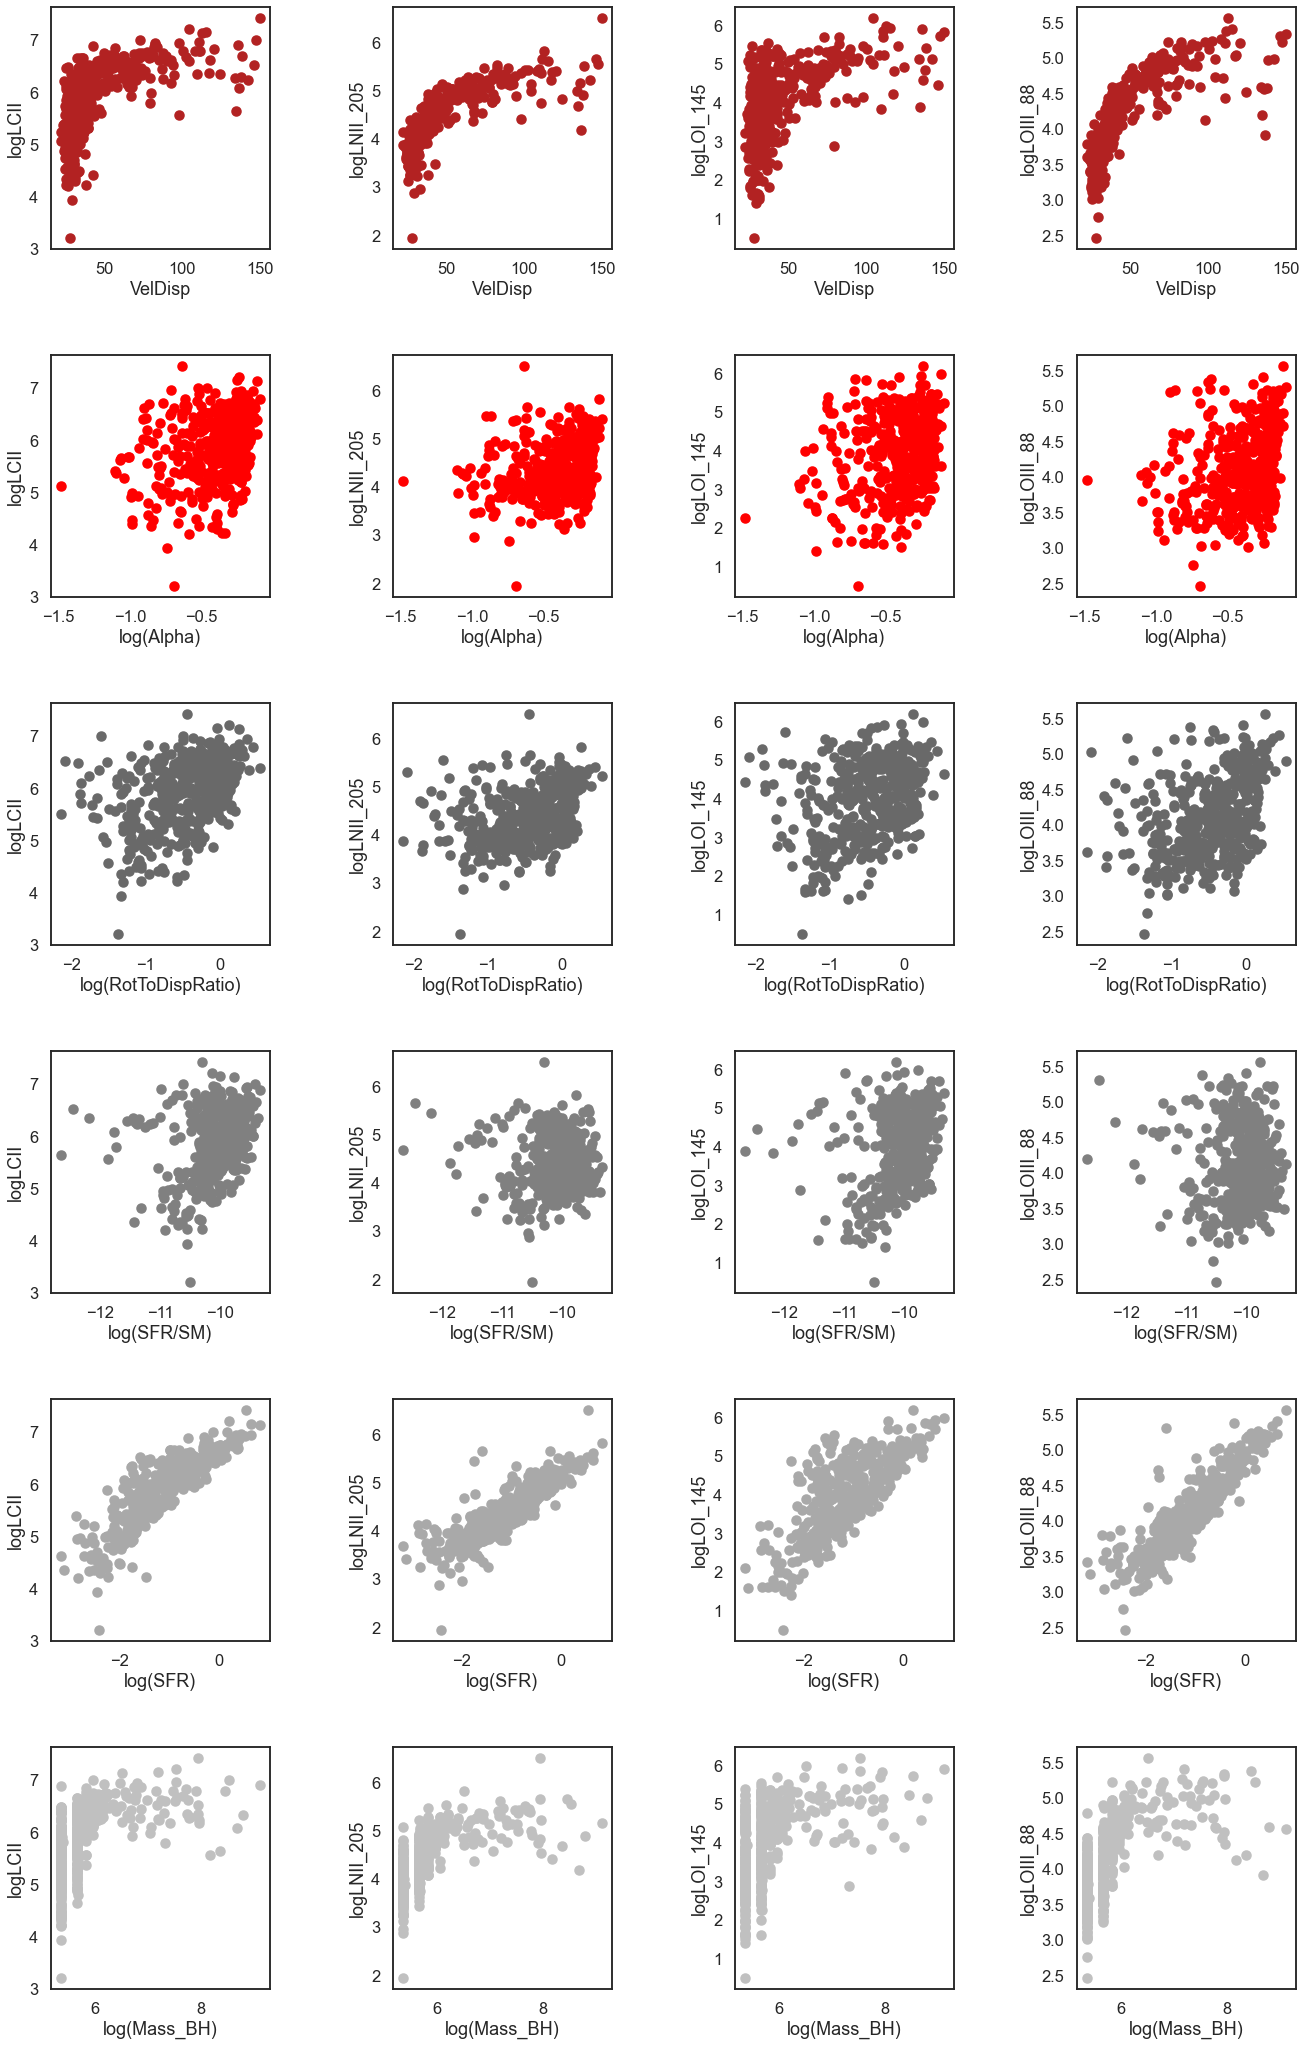

In [12]:
fig, ax = plt.subplots(6,4,figsize=(20,30), facecolor= 'white')
fig.tight_layout(pad=4)

for i_m,mparam in enumerate(mkparam0):
    for i,cparam in enumerate(colors):
        if i==i_m:
            for i_lp, lparam in enumerate(luparam): 
                ax[i_m,i_lp].scatter(mk_lu[mparam],mk_lu[lparam],color=cparam)
                ax[i_m,i_lp].set_xlabel(mparam)
                ax[i_m,i_lp].set_ylabel(lparam)

    

for i_m, mparam in enumerate(mkparam, start=1):
    for i,cparam in enumerate(colors):
        if i==i_m:
            for i_lp, lparam in enumerate(luparam): 
                ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam]),mk_lu[lparam],color=cparam)
                ax[i_m,i_lp].set_xlabel("log("+mparam+")")
                ax[i_m,i_lp].set_ylabel(lparam)


In [13]:
fig.savefig('../Figures/recal.pdf')
fig.savefig('../Figures/recal.jpg')